In [106]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import matplotlib.pylab as plt
import seaborn as sn
import math
from scipy import stats
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import seaborn as sns
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.pyplot import figure
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.ticker as ticker
from sklearn import linear_model
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [107]:
# load and print dataset
df = pd.read_csv('/content/gdrive/MyDrive/Projects/Data Analysis ML/melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [108]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [109]:
df.isnull().sum() #checking nulls

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

# **Pre-Proccesing**

# Data Cleaning

In [110]:
categorical_columns = []
numeric_columns = []
for c in df.columns:
    if df[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames, one for each data type
data_numeric = df[numeric_columns]
data_categorical = pd.DataFrame(df[categorical_columns])


imp = SimpleImputer(missing_values=np.nan, strategy='mean') #imputer by mean

data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns

#join the two masked dataframes back together
df = pd.concat([data_numeric, data_categorical], axis = 1)

In [111]:
df.isnull().sum() #checking nulls again

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
Lattitude           0
Longtitude          0
Propertycount       0
Suburb              0
Address             0
Type                0
Method              0
SellerG             0
Date                0
CouncilArea      1369
Regionname          0
dtype: int64

In [112]:
df.shape

(13580, 21)

In [113]:
df = df[(df.Landsize != 0) & (df.Price != 0) & (df.YearBuilt != 0)] #deleting 0 values

In [114]:
df.shape

(11641, 21)

In [115]:
df = df.drop_duplicates(subset=['Address', 'Suburb']) #droping duplicates

# Pearson Correlation Test


In [116]:
df.corr(method="pearson") #pearson correlation

<ipython-input-116-92308f6acb15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson") #pearson correlation


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.425346,0.217122,0.077950,0.931068,0.586036,0.359917,0.002583,0.082349,0.000379,-0.024805,0.105061,-0.053988
Price,0.425346,1.000000,-0.263824,0.113644,0.402056,0.434144,0.180310,0.023371,0.059141,-0.251414,-0.253040,0.207992,-0.026252
Distance,0.217122,-0.263824,1.000000,0.465854,0.221494,0.093589,0.226560,0.010582,0.067755,0.258796,-0.147668,0.236358,-0.021319
Postcode,0.077950,0.113644,0.465854,1.000000,0.083159,0.127010,0.055885,0.026320,0.042233,0.033078,-0.383418,0.440030,0.057104
Bedroom2,0.931068,0.402056,0.221494,0.083159,1.000000,0.576133,0.357280,0.003401,0.079501,0.011468,-0.023356,0.106273,-0.055673
Bathroom,0.586036,0.434144,0.093589,0.127010,0.576133,1.000000,0.287117,0.028823,0.079178,0.143436,-0.092747,0.122808,-0.043365
Car,0.359917,0.180310,0.226560,0.055885,0.357280,0.287117,1.000000,0.015800,0.062314,0.109554,-0.019661,0.059977,-0.004680
Landsize,0.002583,0.023371,0.010582,0.026320,0.003401,0.028823,0.015800,1.000000,0.092841,0.015304,0.005485,0.009182,-0.002906
BuildingArea,0.082349,0.059141,0.067755,0.042233,0.079501,0.079178,0.062314,0.092841,1.000000,0.010722,0.030282,-0.019731,-0.017973
YearBuilt,0.000379,-0.251414,0.258796,0.033078,0.011468,0.143436,0.109554,0.015304,0.010722,1.000000,0.058428,0.006911,-0.007940


<ipython-input-117-297787f06af5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(method="pearson"), annot=True )


Text(0.5, 1.0, 'Correlation between features')

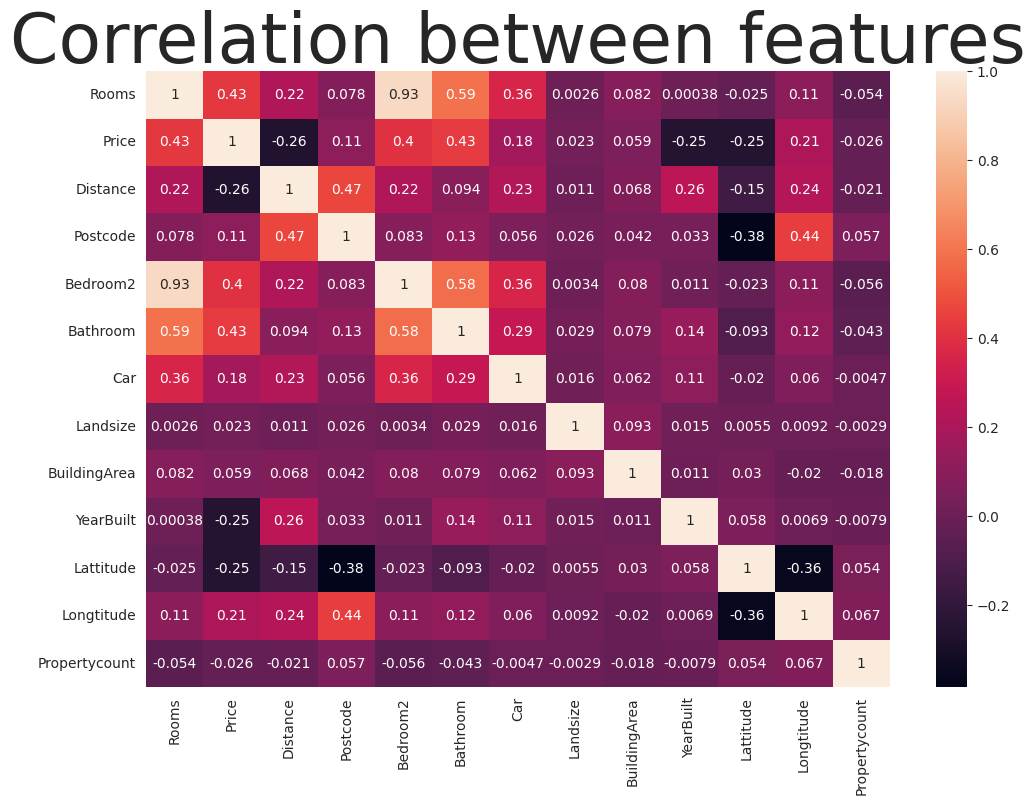

In [117]:
plt.figure(figsize = (12, 8))

sn.heatmap(df.corr(method="pearson"), annot=True )
plt.title("Correlation between features", fontsize = 50)

We can easily see that there is correlation between the variables "Rooms" and "Bedroom2"

# Chi Square Test

In [118]:
cont_df = pd.crosstab(df.Postcode, df.Propertycount, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df) #chi square test - correlation between categorical variables
print(p)

1.0


In [119]:
cont_df = pd.crosstab(df.Postcode, df.CouncilArea, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df)
print(p)

0.9999787601357737


In [120]:
cont_df = pd.crosstab(df.Postcode, df.Suburb, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df)
print(p)

1.0


In [121]:
cont_df = pd.crosstab(df.Propertycount, df.CouncilArea, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df)
print(p)

0.9997018457812595


In [122]:
cont_df = pd.crosstab(df.Propertycount, df.Suburb, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df)
print(p)

0.9205647269644961


In [123]:
cont_df = pd.crosstab(df.Suburb, df.CouncilArea, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df)
print(p)

0.9993553133061108


In [124]:
cont_df = pd.crosstab(df.Suburb, df.Address, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df)
print(p)

1.0


In [125]:
cont_df = pd.crosstab(df.Type, df.Suburb, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df)
print(p)

1.0


In [126]:
cont_df = pd.crosstab(df.Regionname, df.Suburb, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df)
print(p)

1.0


In [127]:
cont_df = pd.crosstab(df.Regionname, df.Type, normalize='index')
c, p, dof, expected = chi2_contingency(cont_df)
print(p)

0.9999999465405686


# Data Reduction

Because we found high correlation between the variables, we can get rid of one of them

In [128]:
df = df.drop(columns=['Bedroom2'])

# Data Transformation

In [129]:
df = df.reset_index(drop=True)

In [130]:
labelencoder = LabelEncoder() #One-Hot for Regionname variable
df['Regionname_bin'] = labelencoder.fit_transform(df['Regionname'])
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Regionname_bin']]).toarray())
df = df.join(enc_df)
df = df.drop(df["Regionname_bin"])
df.drop('Regionname_bin', axis='columns', inplace=True)
enc.get_params(deep=True)

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'ignore',
 'max_categories': None,
 'min_frequency': None,
 'sparse': 'deprecated',
 'sparse_output': True}

In [131]:
df = df.rename(columns = {0 : 'Eastern Metropolitan', 1: 'Eastern Victoria', 2 : 'Northern Metropolitan',
                          3 : 'Northern Victoria', 4 : 'South-Eastern Metropolitan', 5 : 'Southern Metropolitan',
                          6 : 'Western Metropolitan', 7 : 'West Victoria'}, inplace = False)

In [132]:
df = df.reset_index(drop=True)

In [133]:
df['Type_bin'] = labelencoder.fit_transform(df['Type']) #One-Hot for Type variable
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Type_bin']]).toarray())
df = df.join(enc_df)
df = df.drop(df["Type_bin"])
df.drop('Type_bin', axis='columns', inplace=True)
enc.get_params(deep=True)

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'ignore',
 'max_categories': None,
 'min_frequency': None,
 'sparse': 'deprecated',
 'sparse_output': True}

In [134]:
df = df.rename(columns = {0 : 'h', 1: 't', 2 : 'u'}, inplace = False)

In [135]:
df = df.reset_index(drop=True)

In [136]:
df['Method_bin'] = labelencoder.fit_transform(df['Method']) #One-Hot for Method variable
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Method_bin']]).toarray())
df = df.join(enc_df)
df = df.drop(df["Method_bin"])
df.drop('Method_bin', axis='columns', inplace=True)
enc.get_params(deep=True)

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'ignore',
 'max_categories': None,
 'min_frequency': None,
 'sparse': 'deprecated',
 'sparse_output': True}

In [137]:
df = df.rename(columns = {0 : 'PI', 1: 'S', 2 : 'SA',
                          3 : 'SP', 4 : 'VB'}, inplace = False)

In [138]:
df.sample(10)

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Western Metropolitan,West Victoria,h,t,u,PI,S,SA,SP,VB
9245,4.0,1415000.0,12.3,3166.0,2.0,3.0,588.0,151.96765,1970.000000,-37.89215,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6194,3.0,1300000.0,3.2,3054.0,1.0,0.0,223.0,151.96765,1964.684217,-37.79270,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1678,3.0,1278000.0,7.8,3058.0,2.0,3.0,405.0,156.00000,1930.000000,-37.74640,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2072,3.0,1350000.0,5.8,3078.0,1.0,2.0,309.0,110.00000,2000.000000,-37.78280,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7109,4.0,940000.0,19.6,3076.0,3.0,2.0,508.0,364.00000,2012.000000,-37.62693,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
779,3.0,835000.0,13.9,3165.0,1.0,1.0,250.0,105.00000,1980.000000,-37.90870,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6219,3.0,1652500.0,3.4,3068.0,1.0,0.0,276.0,170.00000,1904.000000,-37.79330,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5455,2.0,881000.0,3.5,3121.0,1.0,1.0,172.0,94.00000,1900.000000,-37.82830,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4014,3.0,910000.0,8.8,3072.0,1.0,1.0,486.0,151.96765,1964.684217,-37.73950,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10206,3.0,2831000.0,10.9,3128.0,1.0,3.0,1100.0,151.96765,1964.684217,-37.81640,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Data Visualization

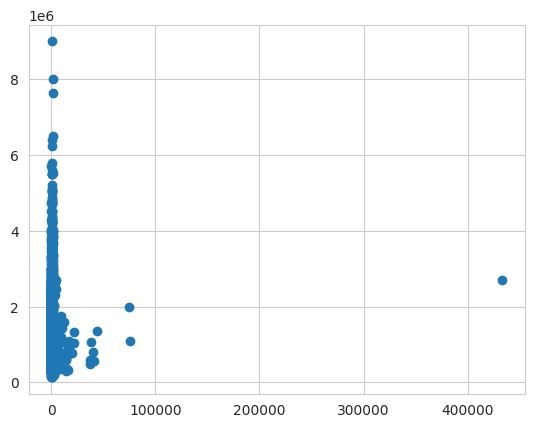

In [139]:
x = df['Landsize']
y = df['Price']
plt.scatter(x, y);

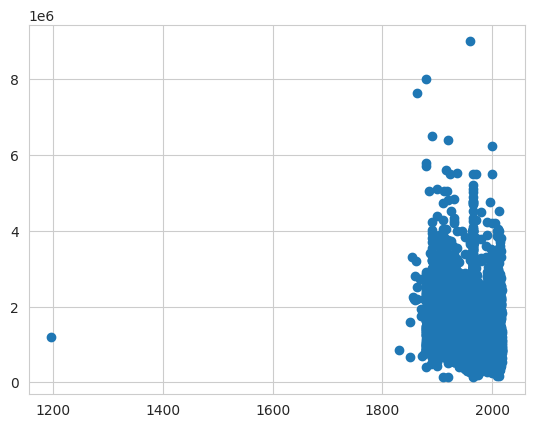

In [140]:
x = df['YearBuilt']
y = df['Price']
plt.scatter(x, y);

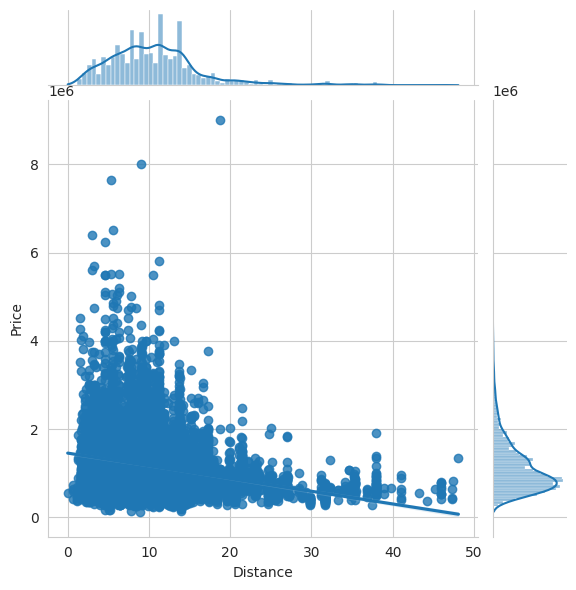

In [141]:
sns.jointplot(data=df, x='Distance', y='Price', kind="reg")

Text(0, 0.5, 'Longtitude')

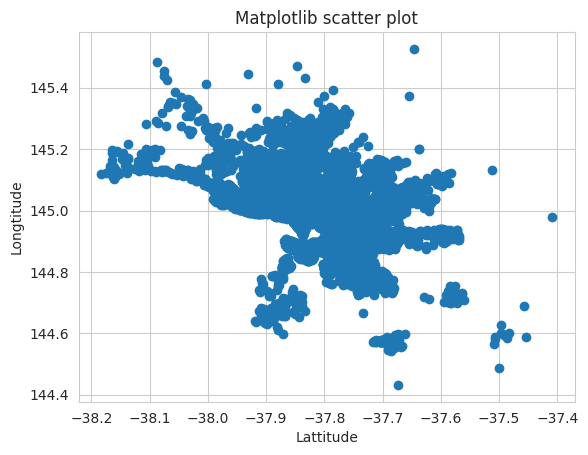

In [142]:
fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Matplotlib scatter plot')
ax1.scatter(df['Lattitude'],df['Longtitude'])
ax1.set_xlabel(r'Lattitude')
ax1.set_ylabel(r'Longtitude')

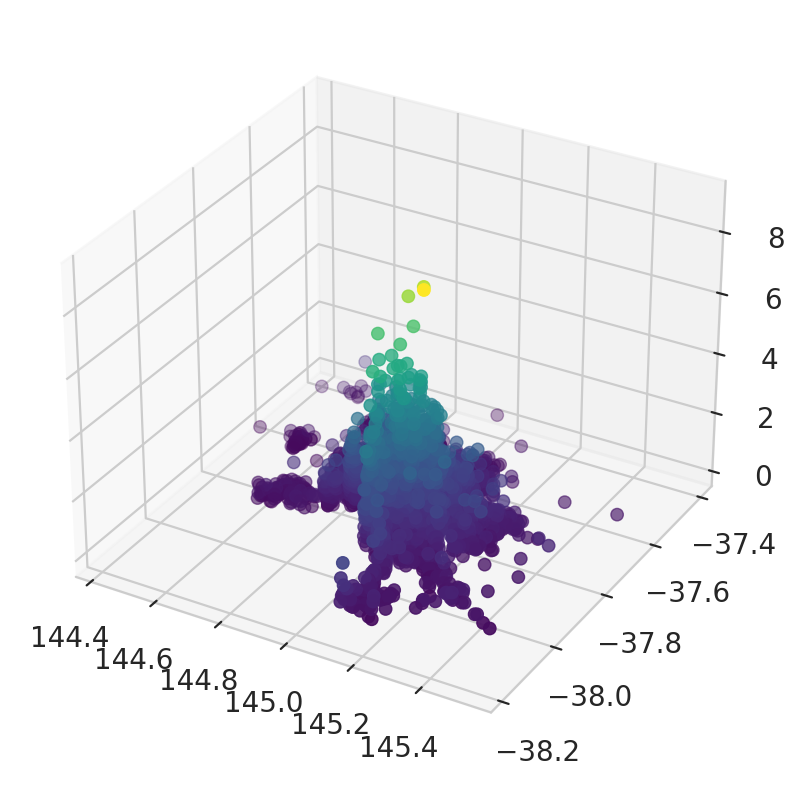

In [143]:
fig = plt.figure(dpi = 200)
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = df['Longtitude']
y = df['Lattitude']
z = df['Price']
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

In [144]:
df.shape

(11532, 36)

<Axes: xlabel='Type', ylabel='Price'>

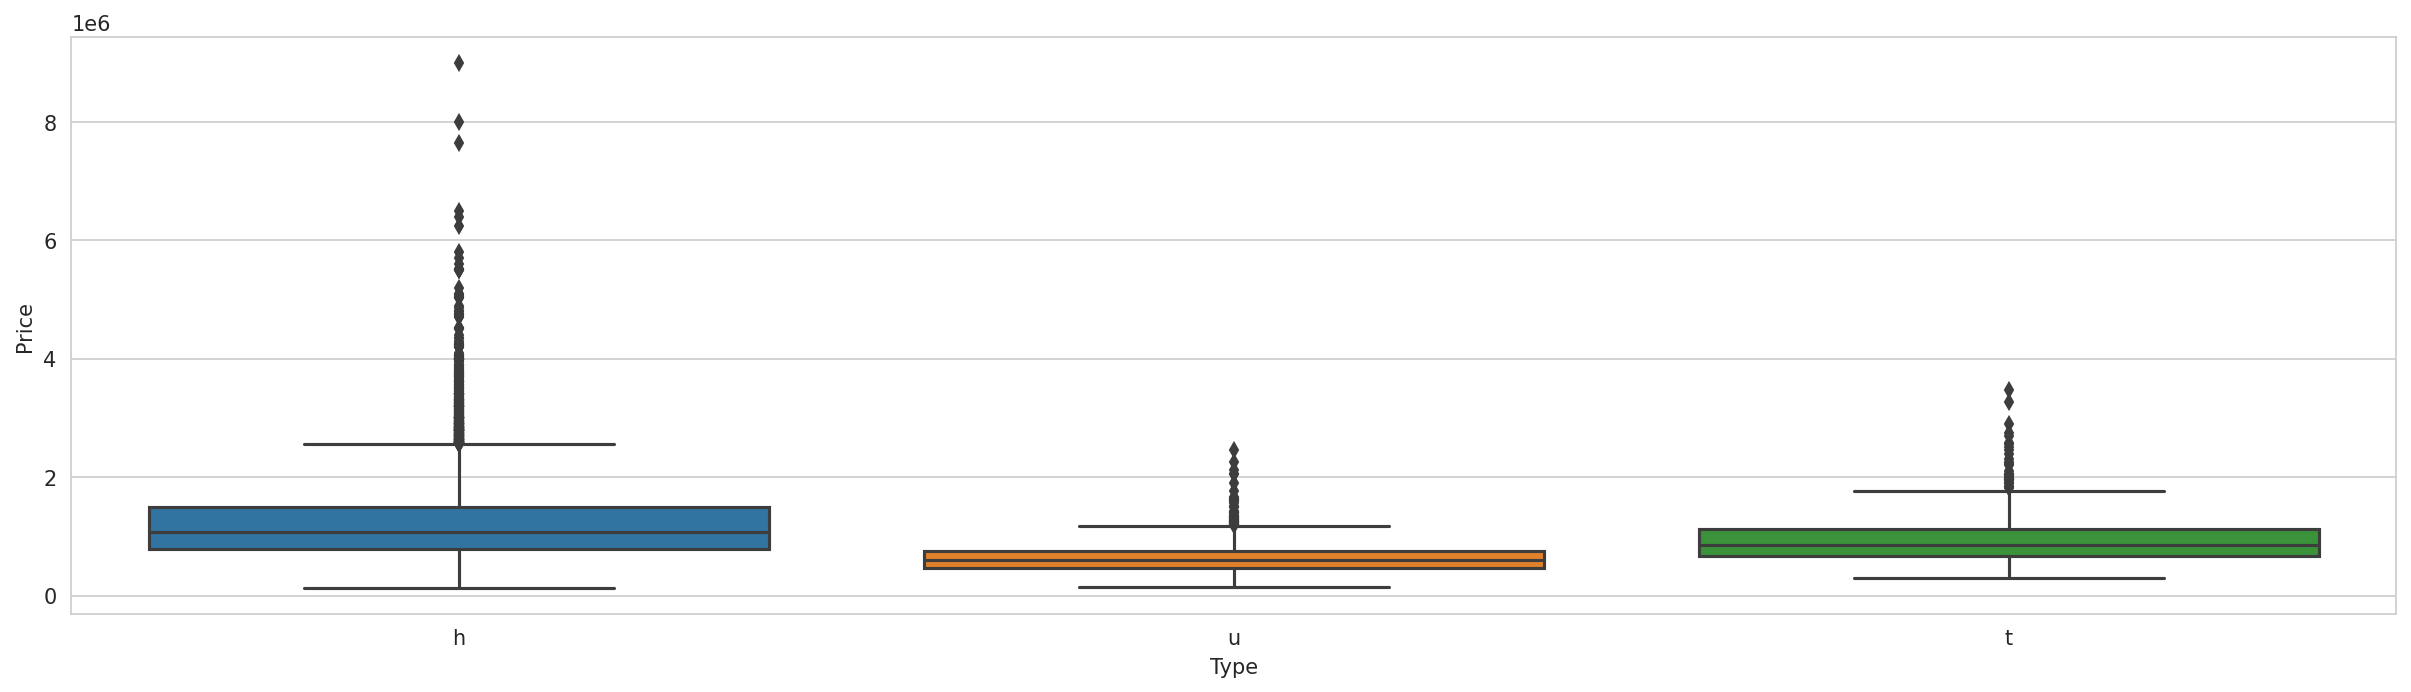

In [145]:
plt.figure(figsize=(20,5),dpi=150)
sns.set_style("whitegrid")
sns.boxplot(x = 'Type', y = 'Price', data = df)

<Axes: xlabel='Regionname', ylabel='Price'>

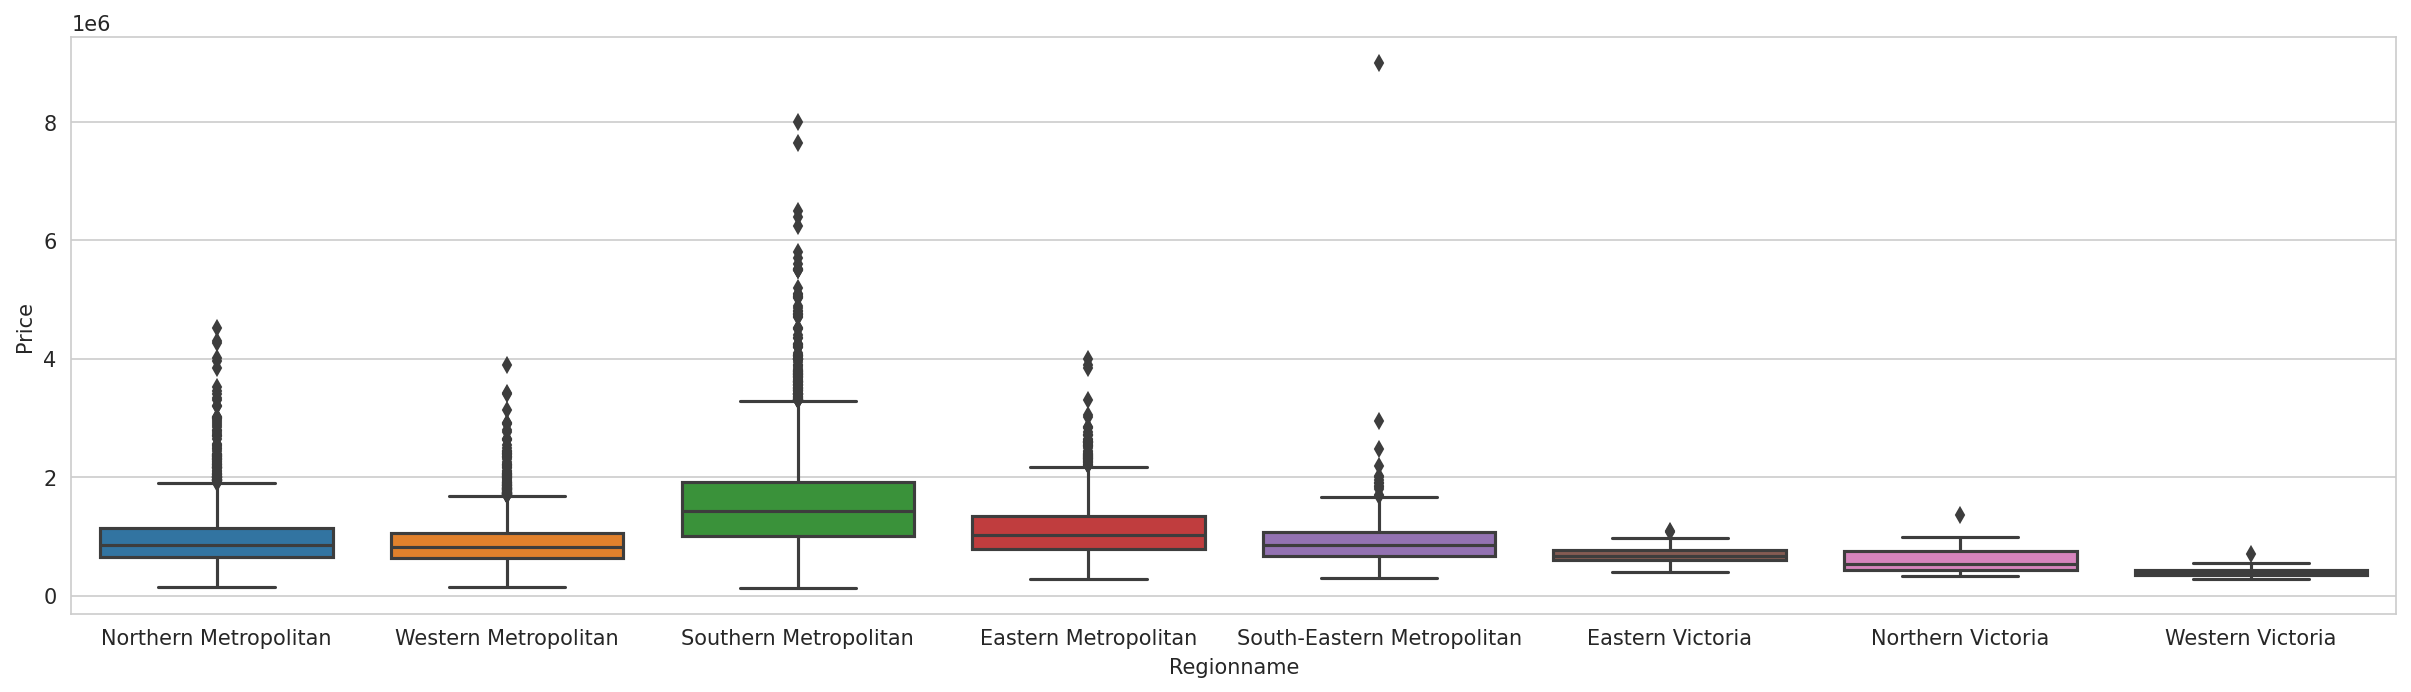

In [146]:
plt.figure(figsize=(20,5),dpi=150)
sns.set_style("whitegrid")
sns.boxplot(x = 'Regionname', y = 'Price', data = df)

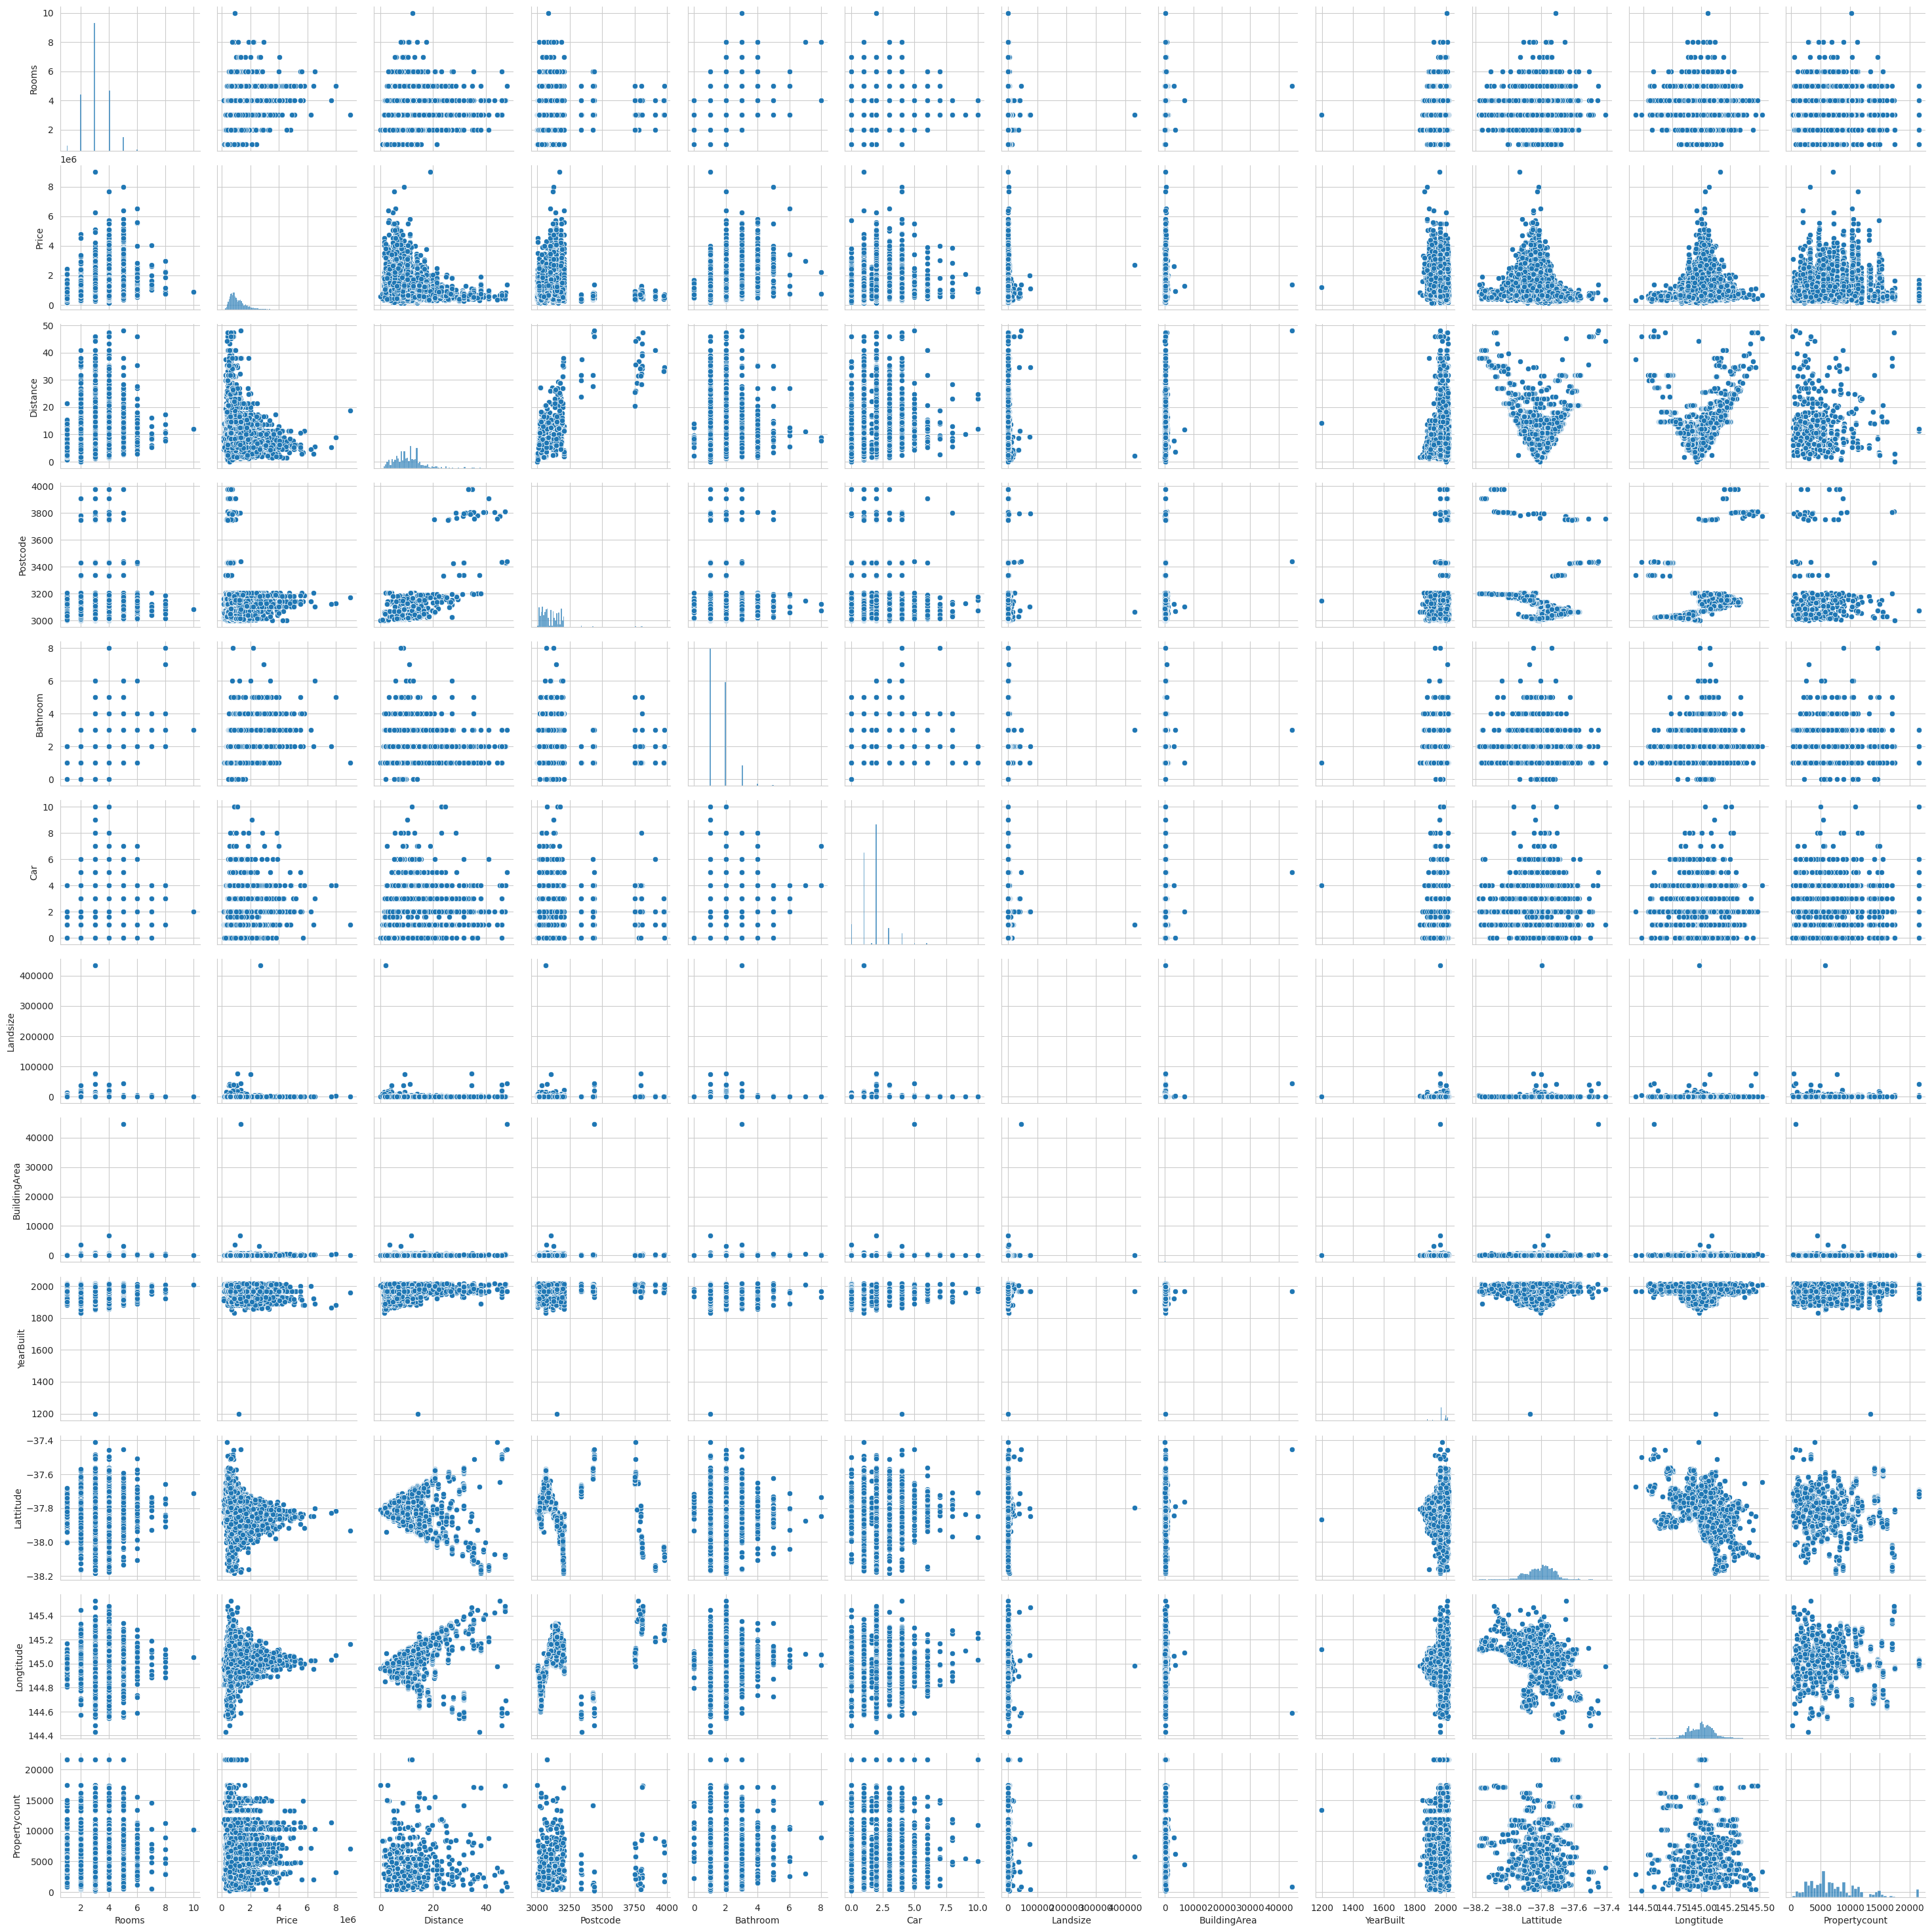

In [147]:
#sn.pairplot(data=df[['Suburb','Address','Rooms','Type','Price','Method','SellerG','Date','Distance','Postcode','Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount']])

# Linear Regression

In [148]:
column_names = ["Rooms","Distance","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude"
,'Eastern Metropolitan','Eastern Victoria',
                'Northern Metropolitan','Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan','Western Metropolitan', 'West Victoria','h', 't', 'u', 'PI', 'S', 'SA', 'SP', 'VB'
                ]

In [149]:
X = df[column_names]
y = df['Price']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [151]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [152]:
# R^2 (coefficient of determination) regression score function
r2lr = r2_score(y_test, y_pred)
print("R Square Score for Linear Regression:",r2lr)
mselr = metrics.mean_squared_error(y_test, y_pred)
print("MSE for Linear Regression:",mselr)
maelr = metrics.mean_absolute_error(y_test, y_pred)
print("MAE for Linear Regression:", maelr)
rmselr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE for Linear Regression:",rmselr)

R Square Score for Linear Regression: 0.5868260594765402
MSE for Linear Regression: 164845311689.61163
MAE for Linear Regression: 275571.27680632606
RMSE for Linear Regression: 406011.46743609547


In [153]:
params = pd.Series(lr.coef_, index=X.columns)
params

Rooms                         1.670043e+05
Distance                     -4.515653e+04
Bathroom                      2.091969e+05
Car                           5.154731e+04
Landsize                      2.831433e+00
BuildingArea                  3.579098e+01
YearBuilt                    -2.390516e+03
Lattitude                    -5.094980e+05
Longtitude                    4.950145e+05
Eastern Metropolitan         -1.641880e+07
Eastern Victoria             -1.618163e+07
Northern Metropolitan        -1.658091e+07
Northern Victoria            -1.590546e+07
South-Eastern Metropolitan   -1.629054e+07
Southern Metropolitan        -1.612067e+07
Western Metropolitan         -1.659323e+07
West Victoria                -1.607790e+07
h                            -4.315896e+07
t                            -4.343614e+07
u                            -4.357404e+07
PI                           -2.610040e+07
S                            -2.599837e+07
SA                           -2.600362e+07
SP         

In [154]:
np.random.seed(1)
err = np.std([lr.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [155]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                                effect      error
Rooms                         167004.0     9976.0
Distance                      -45157.0     1121.0
Bathroom                      209197.0    14577.0
Car                            51547.0     5514.0
Landsize                           3.0        2.0
BuildingArea                      36.0      390.0
YearBuilt                      -2391.0      261.0
Lattitude                    -509498.0    79413.0
Longtitude                    495015.0    70905.0
Eastern Metropolitan       -16418797.0  2065249.0
Eastern Victoria           -16181634.0  2080075.0
Northern Metropolitan      -16580912.0  2054168.0
Northern Victoria          -15905462.0  2047147.0
South-Eastern Metropolitan -16290538.0  2069550.0
Southern Metropolitan      -16120667.0  2061295.0
Western Metropolitan       -16593234.0  2047081.0
West Victoria              -16077896.0  2022144.0
h                          -43158956.0  5479799.0
t                          -43436142.0  5481802.0


In [156]:
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     509.9
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:20:22   Log-Likelihood:            -1.1604e+05
No. Observations:                8072   AIC:                         2.321e+05
Df Residuals:                    8049   BIC:                         2.323e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<Axes: xlabel='Price'>

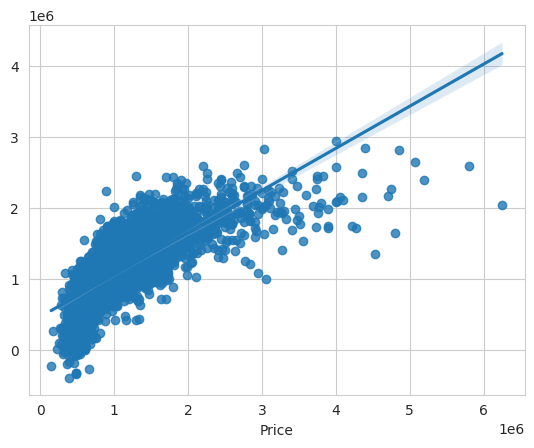

In [157]:
sns.regplot(x=y_test,y=y_pred)

# Random Forest Regressor

In [158]:
y = df.Price
rfr = RandomForestRegressor(n_estimators=200, random_state=1)
rfr = rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [159]:
r2rfr = r2_score(y_test, y_pred)
print("R Square Score for Random Forest Regressor:",r2rfr)
mserfr = metrics.mean_squared_error(y_test, y_pred)
print("MSE for Random Forest Regressor:",mserfr)
maerfr = metrics.mean_absolute_error(y_test, y_pred)
print("MAE for Random Forest Regressor:", maerfr)
rmserfr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE for Random Forest Regressor:", rmserfr)

R Square Score for Random Forest Regressor: 0.8143319425373523
MSE for Random Forest Regressor: 74076571151.74974
MAE for Random Forest Regressor: 164151.56214836222
RMSE for Random Forest Regressor: 272170.1143618633


<Axes: xlabel='Price'>

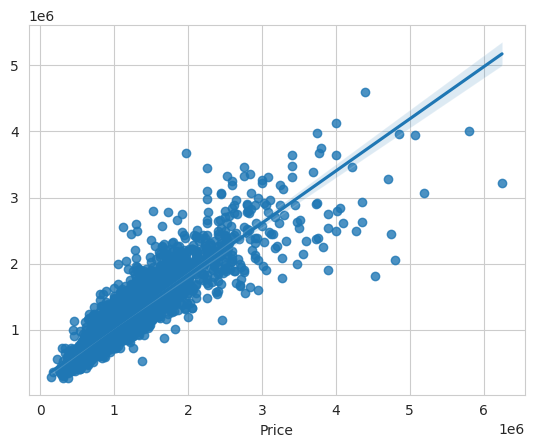

In [160]:
sns.regplot(x=y_test,y=y_pred)

# Decision Tree Regressor

In [161]:
# Create Decision Tree classifer object
dtr = DecisionTreeRegressor(max_depth=7)

# Train Decision Tree Classifer
dtr = dtr.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtr.predict(X_test)

In [162]:
r2dtr = r2_score(y_test, y_pred)
print("R Square Score for Decision Tree Regressor:",r2dtr)
msedtr = metrics.mean_squared_error(y_test, y_pred)
print("MSE for Decision Tree Regressor:",msedtr)
maedtr = metrics.mean_absolute_error(y_test, y_pred)
print("MAE for Decision Tree Regressor:", maedtr)
rmsedtr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE for Decision Tree Regressor:", rmsedtr)

R Square Score for Decision Tree Regressor: 0.6405769341748715
MSE for Decision Tree Regressor: 143400155487.33517
MAE for Decision Tree Regressor: 243510.72684661695
RMSE for Decision Tree Regressor: 378682.12987588305


<Axes: xlabel='Price'>

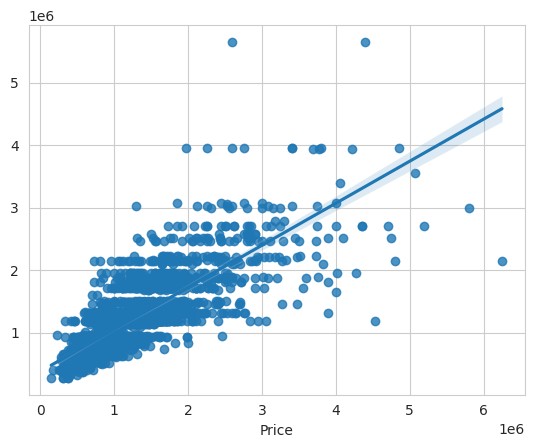

In [163]:
sns.regplot(x=y_test,y=y_pred)

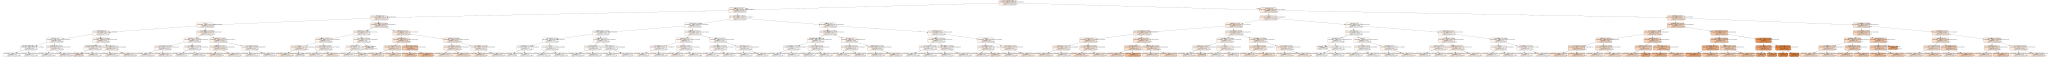

In [164]:
griph = tree.export_graphviz(dtr, out_file=None,
                     feature_names=column_names,
                     class_names=str(np.array(df.Price)),
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(griph)
graph.render("DTR")
#files.download('DTR.pdf')
graph

# Comparison

It's easy to see that the measurements for the Random Forest Regressor algorithm are the best, that's why we would choose that  ML algorithm to evaluate a house's price

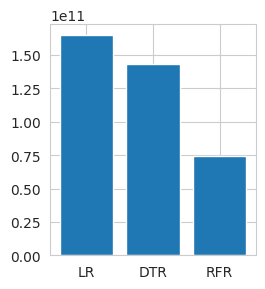

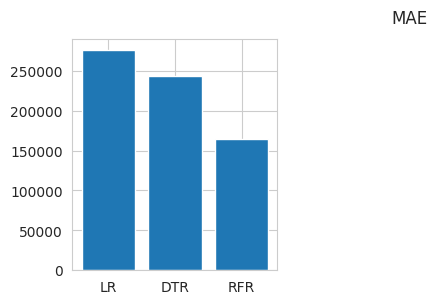

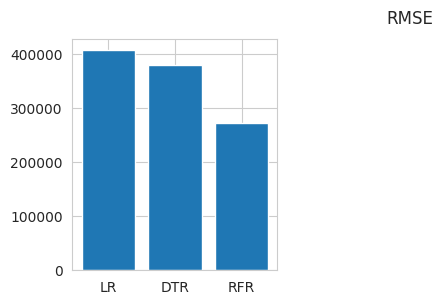

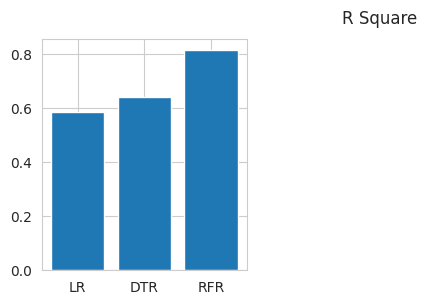

In [165]:
data = ((mselr, maelr, rmselr), (msedtr, maedtr, rmsedtr), (mserfr, maerfr, rmserfr))
names = ['LR', 'DTR', 'RFR']
values = [mselr, msedtr, mserfr]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.show()

names = ['LR', 'DTR', 'RFR']
values = [maelr, maedtr, maerfr]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('MAE')
plt.show()

names = ['LR', 'DTR', 'RFR']
values = [rmselr, rmsedtr, rmserfr]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('RMSE')
plt.show()

names = ['LR', 'DTR', 'RFR']
values = [r2lr, r2dtr, r2rfr]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('R Square')
plt.show()